In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'digit-recognizer:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F3004%2F861823%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20240713%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20240713T182417Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D58ae652dbcffc80e3894b2e6ebe248b8ac80017dd7460240c7d81130b5d5cd99f83e6df6de8bf5f151d3cd24645f9ac6e342db404945794ed0facc4f4956a60fbfafc3414a7454823808bc616c23cbe879694c16291cdbf3004d3d7d9ba851bf80ba872d7ee0db51a01dc4054c335490c5aadc9244199d21d09364fb62d7d8f92f5d037e9b8311818a3de65d0a85ba4001d150a2e9231cd392fef7cdd27d2ca50f69c6a12b57e318a72cd94217cd9a885e6176b0a817ee70b498a65d41b00ba0d1a5ab24101dd8b054100c0d1e5dba05e675c689e712be5faf474631dee68a1e8c30c61a6f7078562a3c59e6e9ed8e19a2fc869741239cd1017cbc3046b806cc'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [ ]:
df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [ ]:
df.shape

(42000, 785)

In [ ]:
df.sample()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
9754      3       0       0       0       0       0       0       0       0   

      pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
9754       0  ...         0         0         0         0         0         0   

      pixel780  pixel781  pixel782  pixel783  
9754         0         0         0         0  

[1 rows x 785 columns]

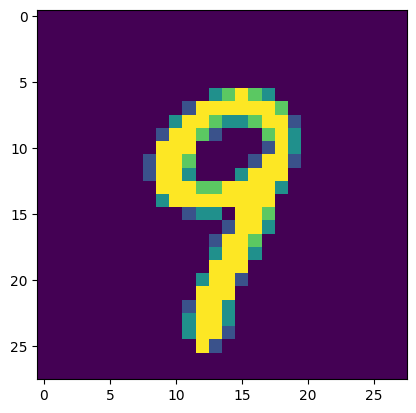

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(df.iloc[37420,1:].values.reshape(28,28))

In [ ]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=43)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
import time
start = time.time()
y_pred = knn.predict(x_test)
print(time.time()-start)

14.894151210784912


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test)

0.9683809523809523

### Applying PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf.shape

(31500, 100)

In [ ]:
knn = KNeighborsClassifier()
knn.fit(x_train_trf,y_train)

KNeighborsClassifier()

In [ ]:
start = time.time()
y_pred = knn.predict(x_test_trf)
print(time.time()-start)

1.9741339683532715


In [ ]:
accuracy_score(y_pred,y_test)

0.9719047619047619

In [ ]:
print("The eigen values are \n",pca.explained_variance_)

The eigen values are 
 [333589.56105944 246933.02237932 211849.60681195 185057.22654077
 167540.59336662 148160.45269997 113155.76284535  99568.77119184
  95142.81272534  80860.83928775  72268.3922197   70229.306001
  58428.9416908   57916.81397301  54355.54228154  50959.74976437
  45023.04962543  44285.24345973  40673.53393875  39524.60556151
  36618.15202515  34804.36738823  33035.51043197  31097.41816382
  30740.28530605  29027.7035524   27860.89587329  26540.20943892
  25349.40779873  23740.32104877  22575.05358925  21895.20168911
  20578.50788236  20016.46510859  19332.33258193  18575.6834162
  17429.58187824  16745.98253349  16216.35798927  16009.00563895
  15527.86872089  15253.22079752  14393.46458129  13644.63199075
  13268.14998603  12930.32087568  12390.46481215  11920.59541853
  11565.18159309  11012.25580045  10863.29083072  10572.38724522
  10040.36078858   9819.4151184    9603.13156404   9295.66307179
   9215.01761001   8835.93337226   8767.5651325    8441.05763853
   82

In [ ]:
pca.explained_variance_.shape

(100,)

In [ ]:
print("the eigen vetcors are : \n",pca.components_)

the eigen vetcors are : 
 [[ 6.62091414e-17  9.10023687e-19  4.75111995e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-7.36228408e-18 -4.43046475e-17  3.05482502e-18 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 3.08378384e-17  1.95937425e-17  1.66153770e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 ...
 [-4.49160683e-17  2.93248938e-17 -4.95782291e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 1.75283656e-17  5.95299230e-17  4.16968233e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.21884164e-18  4.72681091e-17 -5.90755407e-19 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [ ]:
pca.components_.shape

(100, 784)

### Plotting by PCA

In [ ]:
pca = PCA(n_components=2)
x_train_trf=pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf

array([[-413.05742742, -375.58845801],
       [1097.74015281,  -97.71225424],
       [   9.30751561, -729.85122019],
       ...,
       [-101.26659467, -569.19577298],
       [-416.51413518, -378.27596222],
       [-726.37690897,  556.11556728]])

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



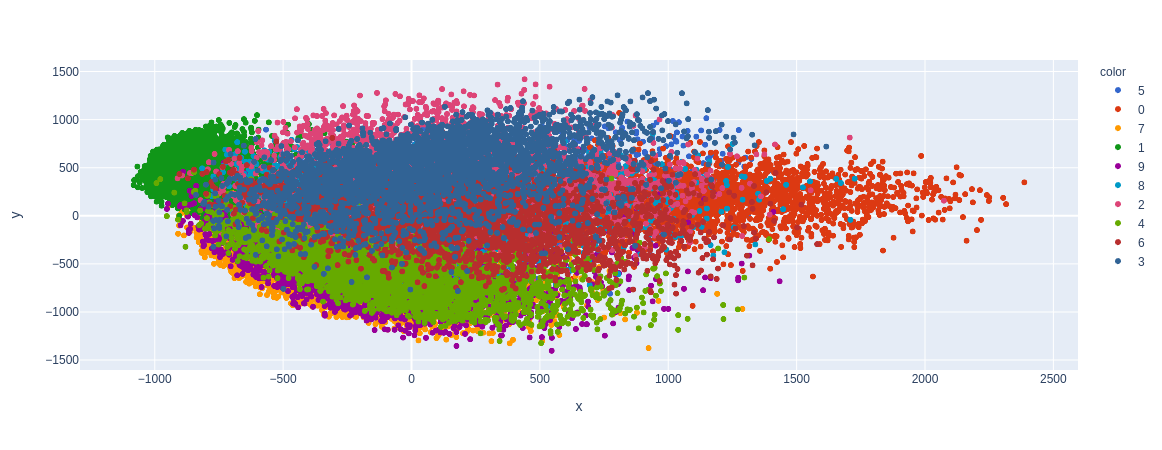

In [ ]:
import plotly.express as px
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

y_train_trf = y_train.astype('str')
fig = px.scatter(x=x_train_trf[:,0],
                y=x_train_trf[:,1],
                color=y_train_trf,
                color_discrete_sequence=px.colors.qualitative.G10)
fig.show()

In [ ]:
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)
x_train_trf

array([[-413.05950481, -375.57174862,  152.88513161],
       [1097.74351211,  -97.73883101, 1194.62110811],
       [   9.30562445, -729.81123933,  596.2124893 ],
       ...,
       [-101.26579165, -569.19852619, -669.84875624],
       [-416.51247272, -378.31098184,  124.67772495],
       [-726.3798458 ,  556.13900411,  116.24273238]])

/opt/conda/lib/python3.10/site-packages/plotly/express/_core.py:2065: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.



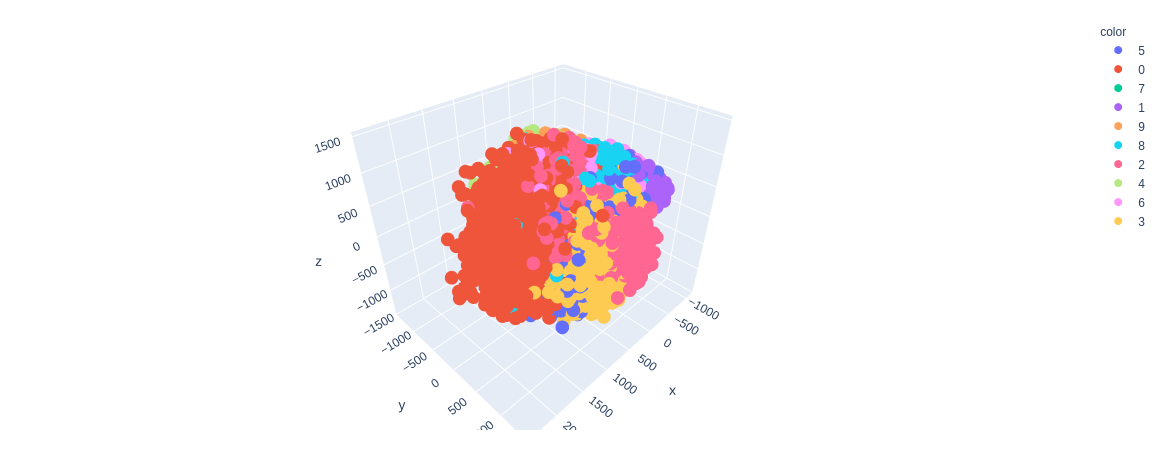

In [ ]:
fig = px.scatter_3d(x=x_train_trf[:,0],
             y=x_train_trf[:,1],
             z=x_train_trf[:,2],
             color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))
fig.show()

In [ ]:
pca = PCA(n_components=None)
pca.fit_transform(x_train)

array([[-4.13059693e+02, -3.75571706e+02,  1.52900495e+02, ...,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.09774342e+03, -9.77307148e+01,  1.19463834e+03, ...,
        -3.83284278e-13, -6.86703344e-14,  1.93798601e-13],
       [ 9.30624900e+00, -7.29832750e+02,  5.96200494e+02, ...,
        -3.97428246e-13, -7.60348136e-14,  2.98464026e-13],
       ...,
       [-1.01265495e+02, -5.69206946e+02, -6.69879368e+02, ...,
        -4.93146937e-16, -1.36233362e-15, -5.06967543e-16],
       [-4.16512944e+02, -3.78291256e+02,  1.24687619e+02, ...,
         3.02250585e-16, -9.78361205e-16, -1.78785044e-16],
       [-7.26379480e+02,  5.56127922e+02,  1.16218042e+02, ...,
         2.44495849e-16,  2.56012858e-15,  1.11636974e-15]])

In [ ]:
# PCA explained variance ratio denotes how much variance that the eigen vector contributes
pca.explained_variance_ratio_

array([9.71344587e-02, 7.19018467e-02, 6.16862735e-02, 5.38848802e-02,
       4.87843948e-02, 4.31412941e-02, 3.29486443e-02, 2.89923901e-02,
       2.77036415e-02, 2.35450229e-02, 2.10430780e-02, 2.04493378e-02,
       1.70133130e-02, 1.68641919e-02, 1.58272224e-02, 1.48384371e-02,
       1.31097914e-02, 1.28949573e-02, 1.18433014e-02, 1.15087569e-02,
       1.06624571e-02, 1.01343201e-02, 9.61926511e-03, 9.05493227e-03,
       8.95094249e-03, 8.45227370e-03, 8.11252317e-03, 7.72796630e-03,
       7.38122922e-03, 6.91269606e-03, 6.57339408e-03, 6.37543512e-03,
       5.99204074e-03, 5.82838543e-03, 5.62918000e-03, 5.40886009e-03,
       5.07513820e-03, 4.87608802e-03, 4.72187265e-03, 4.66149544e-03,
       4.52139832e-03, 4.44142687e-03, 4.19108488e-03, 3.97304079e-03,
       3.86341843e-03, 3.76504972e-03, 3.60786807e-03, 3.47103903e-03,
       3.36756360e-03, 3.20655456e-03, 3.16317470e-03, 3.07849193e-03,
       2.92356935e-03, 2.85924719e-03, 2.79626265e-03, 2.70672422e-03,
      

In [ ]:
cummlative_sum_var_ratio = np.cumsum(pca.explained_variance_ratio_)

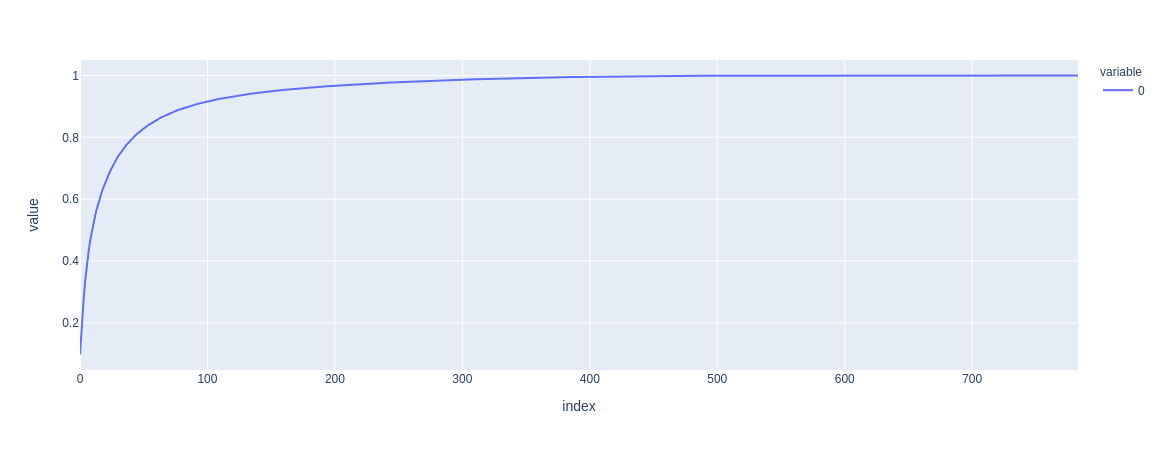

In [ ]:
import matplotlib.pyplot as plt
px.line(cummlative_sum_var_ratio)
# at n_components ~= 181 we got 96% variance
# 181 is optimum value for n_components